# CHAOS

## Chaos in Banking Bubbles
We briefly study the relationship of classical chaos in banking bubbles, based on the work of Giovanni Bella and Paolo Mattana (2020), as well as Miao and Wang (2015).

## The Model
We consider the baseline model described in Miao and Wang
(2015), where financial bubbles are faced by a (continuous time)
deterministic economy composed of households, non-financial
firms and banks. The model assumes that households consume,
save and supply labor (normalized to unity). Households own
non-financial firms and banks. Workers and bankers are two type
of agents belonging to each household. Hence, households deposit
their savings in banks that lend thereafter funds to non-financial
firms. Financial bubbles arise in the stock market value of the
banks.

The standard optimization problem faced by the representa-
tive household leads to the following three-dimensional system
of differential equations:

\begin{equation}
\dot{Q} = rQ -Q[r_k+(r_k-r)\xi Q] - \theta(1-Q)
\end{equation}

\begin{equation}
\dot{B} = rB -Q(r_k-r)B
\end{equation}

\begin{equation}
\dot{N} = [r_k-\theta+(r_k-r)\xi Q]N +(r_k-r)B
\end{equation}


where $Q$ is the shadow price of bank's net worth $N$, and $B$ is the
bubble component of the stock market value of a bank, given by
$QN + B$. Moreover, $r$ represents the deposit rate, whereas $r_k$ is
the lending rate. Additionally, ($\xi,\theta$) $\in$ $(0, 1)^2$ are the degree of
financial frictions and the share of banks’ dividends, respectively.

We resort to a simple runge-kutta method to solve the system of differential equations:

In [8]:
import math
# constants
xi = 0.5556 # (0,1)
theta = 0.055 # (0,1)

# parameters
r_k = 0.5 # 
r = 0.015 # Miao and Wang r = 0.015
#r = 0.045 # OGY r = 0.045
# capital parameters:
alpha = 0.33
delta = 0.1

# step size:
h = 0.000001

# initial conditions:
Q = 1.5  # Steady state value = 1.5
B = 2.36 # Steady state value = 2.36
N = 1.09 # Steady state value = 1.09
t = 0

# functions
def kQ(Q,B,N,t):
    return r*Q-Q*(r_k+(r_k-r)*xi*Q)-theta*(1-Q)

def kB(Q,B,N,t):
    return r*B-Q*(r_k-r)*B

def kN(Q,B,N,t):
    return (r_k-theta+(r_k-r)*xi*Q)*N + (r_k-r)*B

Q_list = list()
Q_list.append(Q)
B_list = list()
B_list.append(B)
N_list = list()
N_list.append(N)
t_list = list()
t_list.append(t)


for i in range(10000000):
    r_k = alpha*math.pow(N + xi*Q*N +B, alpha - 1) - delta
    kQ1 = kQ(Q,B,N,t)
    kQ2 = kQ(Q+h*kQ1/2,B,N,t+h/2)
    kQ3 = kQ(Q+h*kQ2/2,B,N,t+h/2)
    kQ4 = kQ(Q+h*kQ3,B,N,t+h)
    
    kB1 = kB(Q,B,N,t)
    kB2 = kB(Q,B+h*kB1/2,N,t+h/2)
    kB3 = kB(Q,B+h*kB2/2,N,t+h/2)
    kB4 = kB(Q,B+h*kB3,N,t+h)
    
    kN1 = kN(Q,B,N,t)
    kN2 = kN(Q,B,N+h*kN1/2,t+h/2)
    kN3 = kN(Q,B,N+h*kN2/2,t+h/2)
    kN4 = kN(Q,B,N+h*kN3,t+h)
    
    Qn = Q + h*(kQ1 + 2*kQ2 + 2*kQ3 + kQ4)/6
    Bn = B + h*(kB1 + 2*kB2 + 2*kB3 + kB4)/6
    Nn = N + h*(kN1 + 2*kN2 + 2*kN3 + kN4)/6
    
    t = t + h
    Q = Qn
    B = Bn
    N = Nn
    t_list.append(t)
    Q_list.append(Q)
    B_list.append(B)
    N_list.append(N)

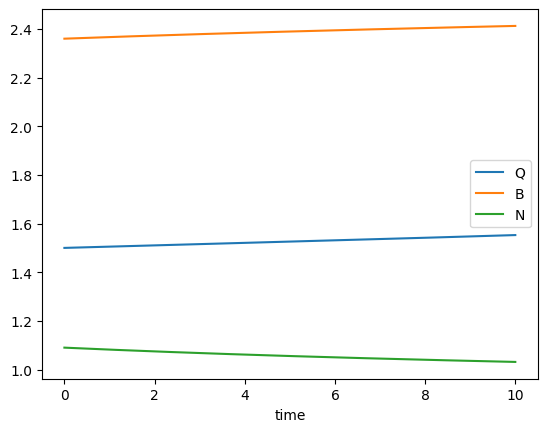

In [9]:
import matplotlib.pyplot as plt 

plt.plot(t_list, Q_list, label = "Q")
#print(Q_list)
#print(t_list)
plt.plot(t_list, B_list, label = "B")
plt.plot(t_list, N_list, label = "N")
plt.xlabel('time')
#plt.yscale('log')
plt.legend()

Text(0, 0.5, 'B')

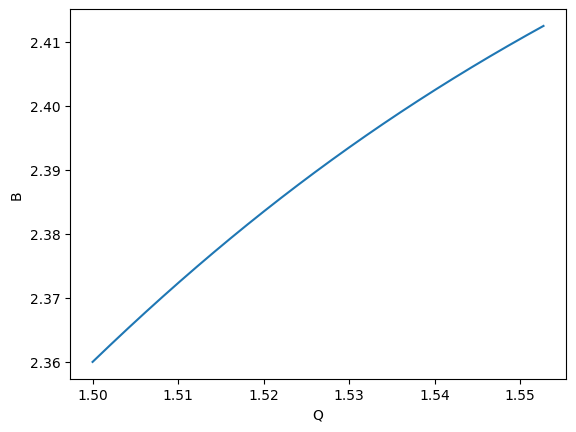

In [10]:
import matplotlib.pyplot as plt

plt.plot(Q_list, B_list)
plt.xlabel("Q")
plt.ylabel("B")

Text(0, 0.5, 'B')

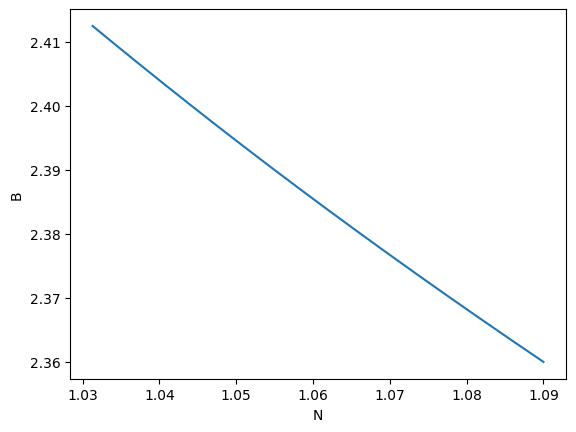

In [11]:
import matplotlib.pyplot as plt

plt.plot(N_list, B_list)
plt.xlabel("N")
plt.ylabel("B")

Text(0, 0.5, 'Q')

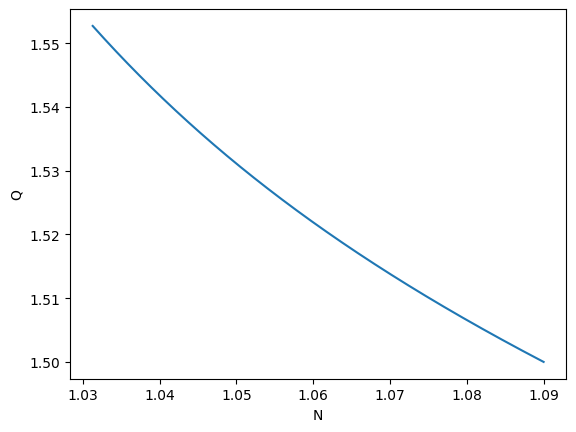

In [12]:
import matplotlib.pyplot as plt

plt.plot(N_list, Q_list)
plt.xlabel("N")
plt.ylabel("Q")